In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

# Carregamento e Visualização Inicial dos Dados

**Objetivo:**

O objetivo desta etapa é carregar o conjunto de dados de reservas de hotel a partir do arquivo CSV (`hotel_booking.csv`) em um DataFrame do pandas. Em seguida, utilizamos o método `head()` para exibir as primeiras linhas do DataFrame, permitindo uma visualização rápida da estrutura dos dados, nomes de colunas e alguns valores iniciais.

In [ ]:
df = pd.read_csv('/content/hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Remoção de Colunas Irrelevantes

**Objetivo:**

O objetivo desta etapa é remover colunas do DataFrame original que são consideradas irrelevantes para a análise ou modelagem. Colunas como `name`, `email`, `phone-number`, `credit_card` contêm informações de identificação pessoal que não são úteis para prever cancelamentos ou ADR, e a coluna `company` possui uma grande quantidade de valores faltantes e pode não ser relevante para a análise geral.

In [ ]:
colunas_para_remover = ['name', 'email', 'phone-number', 'credit_card', 'company']
df_limpo = df.drop(columns=colunas_para_remover)

# Tratamento de Dados Faltantes - Coluna 'children'

**Objetivo:**

O objetivo desta célula é tratar os valores faltantes (NaN) na coluna 'children'. A estratégia adotada é preencher esses valores nulos com 0, assumindo que a ausência de um número para crianças significa que não havia crianças na reserva.

In [ ]:
df_limpo['children'].fillna(0, inplace=True)

/tmp/ipython-input-4203860855.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['children'].fillna(0, inplace=True)


# Tratamento de Dados Faltantes - Coluna 'country'

**Objetivo:**

O objetivo desta célula é tratar os valores faltantes (NaN) na coluna 'country'. A estratégia utilizada é preencher os valores nulos com a moda (o valor mais frequente) da coluna.

In [ ]:
moda_country = df_limpo['country'].mode()[0]
df_limpo['country'].fillna(moda_country, inplace=True)

/tmp/ipython-input-4067099663.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['country'].fillna(moda_country, inplace=True)


# Tratamento de Dados Faltantes - Coluna 'agent'

**Objetivo:**

O objetivo desta célula é tratar os valores faltantes (NaN) na coluna 'agent'. A estratégia adotada é preencher esses valores nulos com 0, com a hipótese de que a ausência de um ID de agente significa que a reserva foi feita diretamente, sem a intermediação de um agente.

In [ ]:
# Para 'agent', nulo pode significar que a reserva foi direta. Preenchemos com 0.
df_limpo['agent'].fillna(0, inplace=True)

/tmp/ipython-input-3931407897.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['agent'].fillna(0, inplace=True)


# EDA

In [ ]:
df_limpo.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


## Proporção de Tipos de Hotel

**Insights Obtidos:**

*   Descobrimos que a maioria das reservas (aproximadamente 66.45%) é para o City Hotel, enquanto o Resort Hotel responde por cerca de 33.55% das reservas.
*   Essa informação é importante para entender a composição do dataset e pode influenciar análises posteriores, indicando que o City Hotel tem um volume de reservas significativamente maior.

In [ ]:
df_limpo['hotel'].value_counts(normalize=True) * 100

,proportion
hotel,
City Hotel,66.446101
Resort Hotel,33.553899


## Proporção de Reservas Canceladas vs. Não Canceladas

**Objetivo:**

**Insights Obtidos:**

*   Verificamos que cerca de 37.04% das reservas foram canceladas, enquanto aproximadamente 62.96% não foram canceladas.
*   Essa proporção revela que os cancelamentos representam uma parcela considerável das reservas, destacando a importância de analisar os fatores que levam aos cancelamentos.

In [ ]:
df_limpo['is_canceled'].value_counts(normalize=True) * 100

,proportion
is_canceled,
0,62.958372
1,37.041628


In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(18, 12))
plt.suptitle('Análise Exploratória de Dados - Dataset Limpo', fontsize=20, y=1.02)

Text(0.5, 1.02, 'Análise Exploratória de Dados - Dataset Limpo')

<Figure size 1800x1200 with 0 Axes>

## Distribuição do Lead Time


**Insights Obtidos:**

*   O histograma mostra que a maioria das reservas é feita com um `lead_time` relativamente curto, com um pico próximo a 0 dias.
*   A distribuição é fortemente assimétrica à direita, indicando que há um número menor de reservas feitas com muita antecedência.
*   Esta visualização confirma que a maioria dos hóspedes tende a reservar com pouca antecedência.

Text(0, 0.5, 'Contagem')

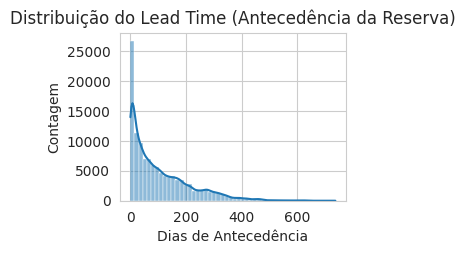

In [ ]:
# Gráfico 1: Distribuição do 'lead_time'
plt.subplot(2, 2, 1)
sns.histplot(df_limpo['lead_time'], kde=True, bins=50)
plt.title('Distribuição do Lead Time (Antecedência da Reserva)')
plt.xlabel('Dias de Antecedência')
plt.ylabel('Contagem')

## Contagem de Reservas por Tipo de Hotel

**Insights Obtidos:**

*   O gráfico de barras confirma a observação feita na análise percentual: o City Hotel tem um número significativamente maior de reservas do que o Resort Hotel.
*   Esta visualização reforça a importância do City Hotel no dataset em termos de volume de reservas.

/tmp/ipython-input-1431050048.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hotel', data=df_limpo, palette='viridis')


Text(0, 0.5, 'Número de Reservas')

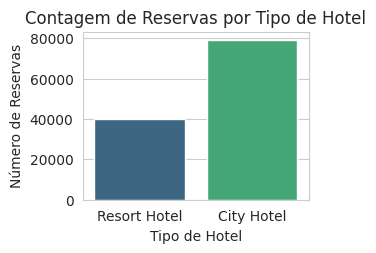

In [ ]:
# Gráfico 2: Contagem de Reservas por Tipo de Hotel
plt.subplot(2, 2, 2)
sns.countplot(x='hotel', data=df_limpo, palette='viridis')
plt.title('Contagem de Reservas por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Número de Reservas')

## Cancelamentos por Tipo de Hotel

**Insights Obtidos:**

*   O gráfico mostra o número absoluto de reservas canceladas e não canceladas para cada hotel.
*   É possível observar que, em termos absolutos, o City Hotel tem um número maior de cancelamentos e não cancelamentos, o que se alinha com seu maior volume total de reservas.

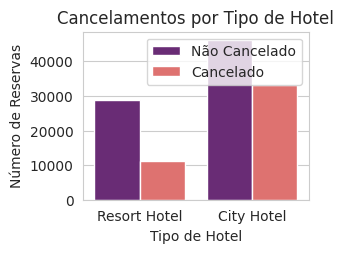

In [ ]:
# Gráfico 3: Cancelamentos por Tipo de Hotel
plt.subplot(2, 2, 3)
sns.countplot(x='hotel', hue='is_canceled', data=df_limpo, palette='magma')
plt.title('Cancelamentos por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('Número de Reservas')
plt.legend(['Não Cancelado', 'Cancelado'])

## Distribuição do ADR por Tipo de Hotel

**Objetivo:**

O objetivo desta célula é visualizar a distribuição do ADR (Average Daily Rate - Preço Médio Diário) para cada tipo de hotel usando um box plot. Isso nos permite comparar a faixa de preços e a mediana do ADR entre o City Hotel e o Resort Hotel, além de identificar outliers.

**Insights Obtidos:**

*   O box plot mostra a distribuição do ADR para ambos os tipos de hotel.
*   Podemos observar a mediana, os quartis e a dispersão do ADR para cada hotel. O limite `plt.ylim(0, 500)` foi ajustado para focar na maioria dos dados e visualizar melhor a distribuição principal, embora outliers com ADR muito alto existam.
*   A mediana do ADR parece ser ligeiramente diferente entre os dois hotéis.

/tmp/ipython-input-3931380459.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='hotel', y='adr', data=df_limpo, palette='coolwarm')


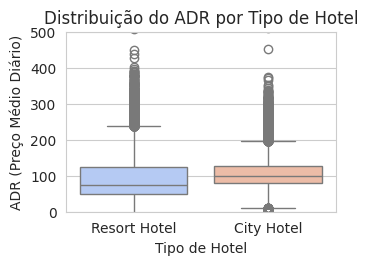

In [ ]:
# Gráfico 4: ADR (Average Daily Rate) por Tipo de Hotel
plt.subplot(2, 2, 4)
sns.boxplot(x='hotel', y='adr', data=df_limpo, palette='coolwarm')
plt.title('Distribuição do ADR por Tipo de Hotel')
plt.xlabel('Tipo de Hotel')
plt.ylabel('ADR (Preço Médio Diário)')
plt.ylim(0, 500) # Ajustando o limite para focar na maioria dos dados

plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajusta o layout
plt.show()


## Análise de Tendências de Reservas ao Longo do Ano

**Objetivo:**

O objetivo desta célula é analisar e visualizar a tendência mensal de reservas (apenas reservas não canceladas) para cada tipo de hotel ao longo dos anos presentes no dataset. Isso ajuda a identificar padrões sazonais na demanda por hotéis.

**Insights Obtidos:**

*   O gráfico de linha mostra claramente a variação no número de reservas confirmadas para o City Hotel e o Resort Hotel ao longo dos meses.
*   Ambos os tipos de hotel exibem uma sazonalidade, com picos de reservas geralmente ocorrendo nos meses de verão (Julho e Agosto).
*   O City Hotel consistentemente tem um volume maior de reservas confirmadas em comparação com o Resort Hotel na maioria dos meses.
*   Os meses de baixa temporada parecem ser Novembro, Dezembro, Janeiro e Fevereiro.

/tmp/ipython-input-3091195881.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['children'].fillna(0, inplace=True)
/tmp/ipython-input-3091195881.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

--- Número de Reservas (Não Canceladas) por Mês e Hotel ---
           hotel arrival_date_month  num_bookings
4     City Hotel            January          2249
16  Resort Hotel            January          1866
3     City Hotel           February          3051
15  Resort Hotel           February          2308
7     City Hotel              March          4049
19  Resort Hotel              March          2571
0     City Hotel              April          4010
12  Resort Hotel              April          2550
20  Resort Hotel                May          2535
8     City Hotel                May          4568
6     City Hotel               June          4358
18  Resort Hotel               June          2037
5     City Hotel               July          4770
17  Resort Hotel               July          3137
1     City Hotel             August          5367
13  Resort Hotel             August          3257
11    City Hotel          September          4283
23  Resort Hotel          September     

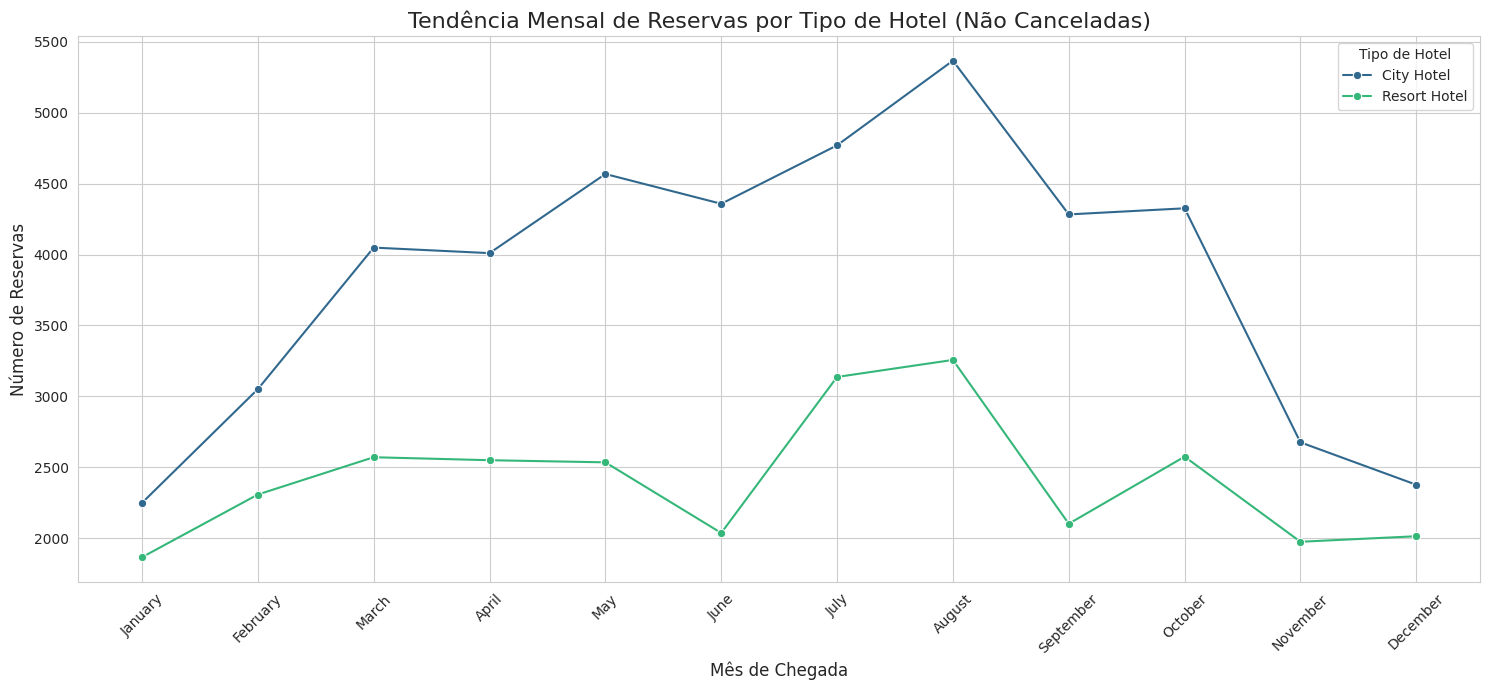

In [ ]:
# --- Início da Fase de Limpeza (Garantindo que df_limpo esteja atualizado) ---
df = pd.read_csv('hotel_booking.csv')
colunas_para_remover = ['name', 'email', 'phone-number', 'credit_card', 'company']
df_limpo = df.drop(columns=colunas_para_remover)
df_limpo['children'].fillna(0, inplace=True)
df_limpo['country'].fillna(df_limpo['country'].mode()[0], inplace=True)
df_limpo['agent'].fillna(0, inplace=True)
df_limpo = df_limpo[~((df_limpo['adults'] == 0) & (df_limpo['children'] == 0) & (df_limpo['babies'] == 0))]
df_limpo = df_limpo[df_limpo['adr'] < 5000]

# --- Início da Análise de Tendências ---

# Filtrando apenas as reservas que não foram canceladas (is_canceled == 0)
demand_df = df_limpo[df_limpo['is_canceled'] == 0].copy()

# Agrupando os dados por hotel e mês de chegada
bookings_by_month = demand_df.groupby(['hotel', 'arrival_date_month']).size().reset_index(name='num_bookings')

# Criando uma ordem cronológica para os meses para o gráfico ordenar corretamente
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
bookings_by_month['arrival_date_month'] = pd.Categorical(bookings_by_month['arrival_date_month'], categories=month_order, ordered=True)

# Ordenando o dataframe pela ordem dos meses
bookings_by_month = bookings_by_month.sort_values('arrival_date_month')

print("--- Número de Reservas (Não Canceladas) por Mês e Hotel ---")
print(bookings_by_month)

# --- Visualização ---
plt.figure(figsize=(15, 7))
sns.lineplot(data=bookings_by_month, x='arrival_date_month', y='num_bookings', hue='hotel', marker='o', palette='viridis')

plt.title('Tendência Mensal de Reservas por Tipo de Hotel (Não Canceladas)', fontsize=16)
plt.xlabel('Mês de Chegada', fontsize=12)
plt.ylabel('Número de Reservas', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tipo de Hotel')
plt.grid(True)
plt.tight_layout()

# Salvar a figura para referência
plt.savefig('tendencia_mensal_reservas.png')

plt.show()

## Análise de Depósitos e Cancelamentos

**Objetivo:**

O objetivo desta célula é analisar a relação entre a política de depósito (`deposit_type`) e a taxa de cancelamento, separando a análise por tipo de hotel. Isso nos ajuda a entender como as diferentes políticas de depósito impactam a probabilidade de uma reserva ser cancelada.

**Insights Obtidos:**

*   A análise revela uma forte correlação entre o tipo de depósito e a taxa de cancelamento.
*   Reservas com **"Non Refund"** (Não Reembolsável) têm uma taxa de cancelamento extremamente alta (próxima de 100%), tanto para City Hotel quanto para Resort Hotel. Isso é esperado, pois os hóspedes perdem o valor total em caso de cancelamento.
*   Reservas com **"No Deposit"** (Sem Depósito) têm taxas de cancelamento significativamente menores em comparação com "Non Refund".
*   Reservas com **"Refundable"** (Reembolsável) têm taxas de cancelamento variadas, sendo mais baixas no Resort Hotel do que no City Hotel.

/tmp/ipython-input-3980275383.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['children'].fillna(0, inplace=True)
/tmp/ipython-input-3980275383.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

--- Taxa de Cancelamento (%) por Política de Depósito e Hotel ---
  deposit_type         hotel  cancellation_rate_%
5   Refundable  Resort Hotel            15.492958
1   No Deposit  Resort Hotel            24.742052
0   No Deposit    City Hotel            30.510751
4   Refundable    City Hotel            70.000000
3   Non Refund  Resort Hotel            95.986038
2   Non Refund    City Hotel            99.813476


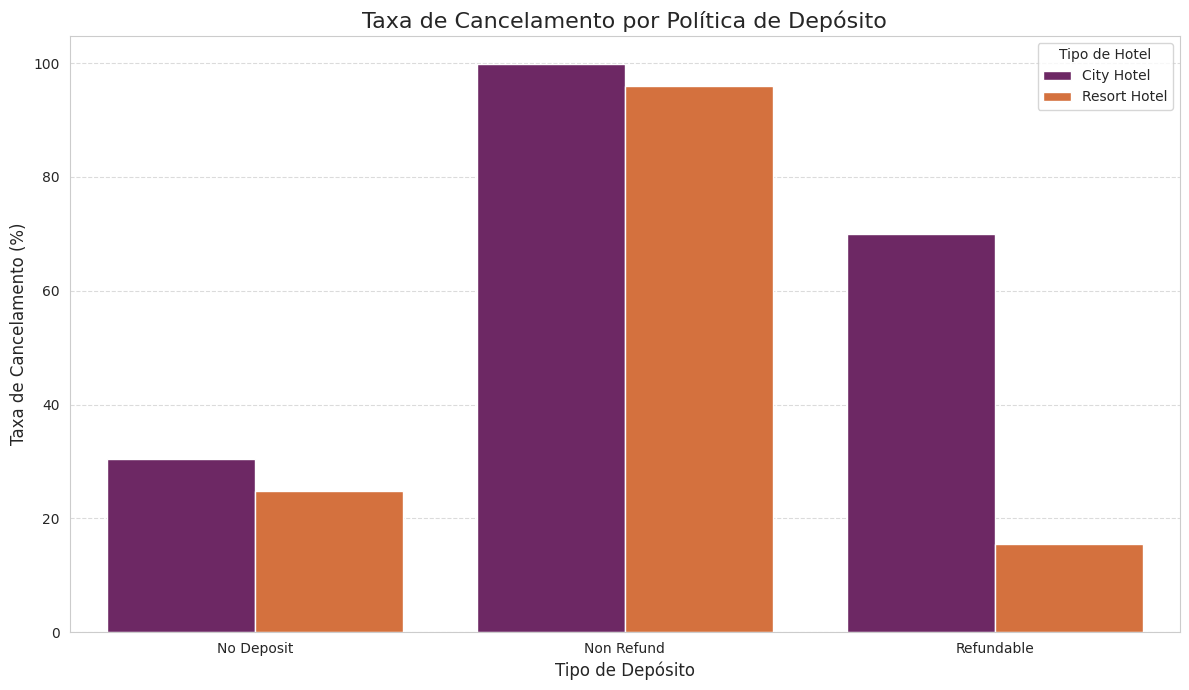

In [ ]:
# --- Início da Fase de Limpeza (Garantindo que df_limpo esteja atualizado) ---
df = pd.read_csv('hotel_booking.csv')
colunas_para_remover = ['name', 'email', 'phone-number', 'credit_card', 'company']
df_limpo = df.drop(columns=colunas_para_remover)
df_limpo['children'].fillna(0, inplace=True)
df_limpo['country'].fillna(df_limpo['country'].mode()[0], inplace=True)
df_limpo['agent'].fillna(0, inplace=True)
df_limpo = df_limpo[~((df_limpo['adults'] == 0) & (df_limpo['children'] == 0) & (df_limpo['babies'] == 0))]
df_limpo = df_limpo[df_limpo['adr'] < 5000]

# --- Início da Análise de Depósitos e Cancelamentos ---

# Agrupando por tipo de depósito e hotel para calcular a taxa de cancelamento
cancellation_by_deposit = df_limpo.groupby(['deposit_type', 'hotel'])['is_canceled'].mean().reset_index()

# Multiplicando por 100 para visualizar como porcentagem
cancellation_by_deposit['cancellation_rate_%'] = cancellation_by_deposit['is_canceled'] * 100

print("--- Taxa de Cancelamento (%) por Política de Depósito e Hotel ---")
print(cancellation_by_deposit[['deposit_type', 'hotel', 'cancellation_rate_%']].sort_values('cancellation_rate_%'))

# --- Visualização ---
plt.figure(figsize=(12, 7))
sns.barplot(data=cancellation_by_deposit, x='deposit_type', y='cancellation_rate_%', hue='hotel', palette='inferno')

plt.title('Taxa de Cancelamento por Política de Depósito', fontsize=16)
plt.xlabel('Tipo de Depósito', fontsize=12)
plt.ylabel('Taxa de Cancelamento (%)', fontsize=12)
plt.legend(title='Tipo de Hotel')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Salvar a figura para referência
plt.savefig('impacto_deposito_cancelamento.png')

plt.show()


/tmp/ipython-input-2566346264.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['children'].fillna(0, inplace=True)
/tmp/ipython-input-2566346264.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Tamanho do conjunto de treino: 58710 amostras
Tamanho do conjunto de teste: 14678 amostras

--- Treinando Modelo de Regressão Linear ---
--- Treinando Modelo Random Forest ---

--- Métricas de Avaliação ---

Regressão Linear:
MAE: 23.40
MSE: 1011.86
R²: 0.55

Random Forest:
MAE: 16.12
MSE: 555.17
R²: 0.75

--- Top 10 Features Mais Importantes (Random Forest) ---
                              importance
total_guests                    0.248439
hotel_Resort Hotel              0.131036
arrival_date_month_July         0.100709
lead_time                       0.094250
arrival_date_month_August       0.087649
market_segment_Offline TA/TO    0.042853
arrival_date_month_June         0.029737
total_nights                    0.027890
market_segment_Online TA        0.022109
reserved_room_type_E            0.021876


/tmp/ipython-input-2566346264.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.importance, y=top_10_features.index, palette='rocket')


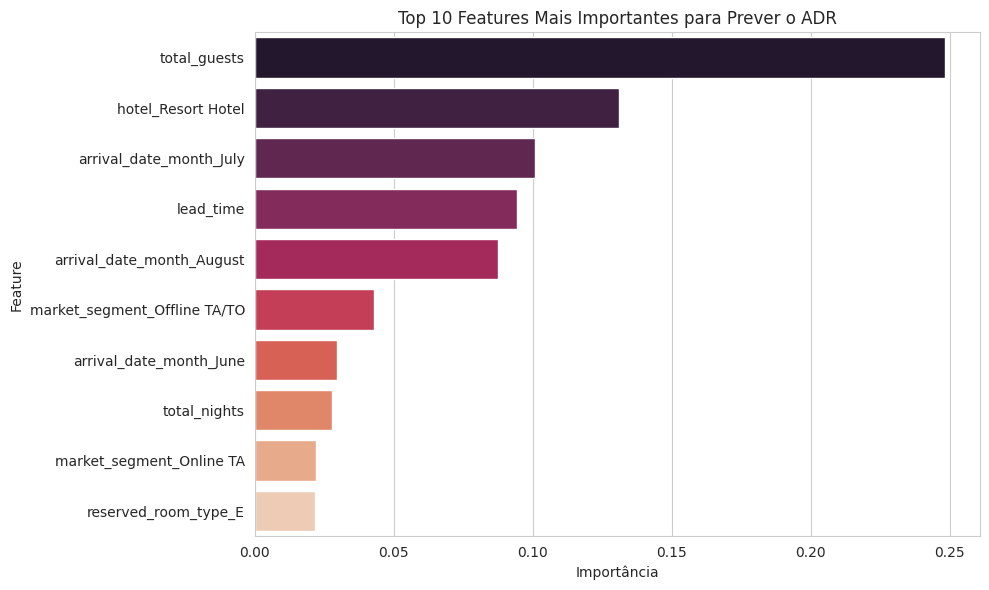

In [ ]:
# --- Início da Fase de Limpeza (Garantindo que df_limpo esteja atualizado) ---
df = pd.read_csv('hotel_booking.csv')
colunas_para_remover = ['name', 'email', 'phone-number', 'credit_card', 'company']
df_limpo = df.drop(columns=colunas_para_remover)
df_limpo['children'].fillna(0, inplace=True)
df_limpo['country'].fillna(df_limpo['country'].mode()[0], inplace=True)
df_limpo['agent'].fillna(0, inplace=True)
df_limpo = df_limpo[~((df_limpo['adults'] == 0) & (df_limpo['children'] == 0) & (df_limpo['babies'] == 0))]
df_limpo = df_limpo[df_limpo['adr'] < 5000]
# Filtrar apenas por reservas não canceladas e com ADR > 0 para o modelo
df_model = df_limpo[(df_limpo['is_canceled'] == 0) & (df_limpo['adr'] > 0)].copy()

# --- 1. Seleção e Engenharia de Features ---
df_model['total_nights'] = df_model['stays_in_week_nights'] + df_model['stays_in_weekend_nights']
df_model['total_guests'] = df_model['adults'] + df_model['children'] + df_model['babies']

features = [
    'hotel', 'lead_time', 'arrival_date_month', 'total_nights', 'total_guests',
    'market_segment', 'distribution_channel', 'is_repeated_guest',
    'reserved_room_type', 'customer_type', 'total_of_special_requests', 'required_car_parking_spaces'
]
target = 'adr'
X = df_model[features]
y = df_model[target]

# --- 2. Pré-processamento para Modelagem (One-Hot Encoding) ---
X = pd.get_dummies(X, drop_first=True)

# --- 3. Divisão em Treino e Teste ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

# --- 4. Treinamento dos Modelos ---
print("\n--- Treinando Modelo de Regressão Linear ---")
lr = LinearRegression()
lr.fit(X_train, y_train)

print("--- Treinando Modelo Random Forest ---")
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15, min_samples_split=5)
rf.fit(X_train, y_train)

# --- 5. Avaliação dos Modelos ---
y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

metrics_lr = {'MAE': mean_absolute_error(y_test, y_pred_lr), 'MSE': mean_squared_error(y_test, y_pred_lr), 'R²': r2_score(y_test, y_pred_lr)}
metrics_rf = {'MAE': mean_absolute_error(y_test, y_pred_rf), 'MSE': mean_squared_error(y_test, y_pred_rf), 'R²': r2_score(y_test, y_pred_rf)}

print("\n--- Métricas de Avaliação ---")
print("\nRegressão Linear:")
for metric, value in metrics_lr.items():
    print(f"{metric}: {value:.2f}")

print("\nRandom Forest:")
for metric, value in metrics_rf.items():
    print(f"{metric}: {value:.2f}")

# --- 6. Análise de Importância das Features ---
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
top_10_features = feature_importances.head(10)

print("\n--- Top 10 Features Mais Importantes (Random Forest) ---")
print(top_10_features)

# Visualização da importância das features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.importance, y=top_10_features.index, palette='rocket')
plt.title('Top 10 Features Mais Importantes para Prever o ADR')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance_adr.png')
plt.show()

# Análise Comparativa de Novos Clientes vs. Clientes Repetidos

**Objetivo:**

O objetivo desta célula é comparar o comportamento de reserva e cancelamento entre novos clientes e clientes repetidos (`is_repeated_guest`). Analisamos a proporção de cada grupo, a taxa de cancelamento para cada grupo e o ADR médio para reservas não canceladas.

**Insights Obtidos:**

*   **Proporção de Clientes:** A vasta maioria das reservas (cerca de 96.85%) é feita por novos clientes, enquanto apenas uma pequena porcentagem (cerca de 3.15%) é de clientes repetidos.
*   **Taxa de Cancelamento:** Clientes repetidos (`is_repeated_guest` == 1) têm uma taxa de cancelamento significativamente menor (aproximadamente 14.65%) em comparação com novos clientes (`is_repeated_guest` == 0), cuja taxa é de cerca de 37.81%. Isso indica que clientes repetidos são mais propensos a honrar suas reservas.
*   **ADR Médio:** O ADR médio para reservas não canceladas é maior para novos clientes (aproximadamente €101.79) do que para clientes repetidos (aproximadamente €63.89). Isso pode sugerir que novos clientes estão reservando quartos ou períodos mais caros, ou que o hotel oferece tarifas especiais para incentivar a repetição.

/tmp/ipython-input-2266303961.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['children'].fillna(0, inplace=True)
/tmp/ipython-input-2266303961.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

--- Proporção de Clientes ---
is_repeated_guest
0    115454
1      3755
Name: count, dtype: int64

Percentual de Clientes Repetidos: 3.15%

--- Taxa de Cancelamento por Tipo de Cliente ---
   is_repeated_guest  cancellation_rate_%
0                  0            37.805533
1                  1            14.647137

--- ADR Médio por Tipo de Cliente (Reservas Não-Canceladas) ---
   is_repeated_guest         adr
0                  0  101.788682
1                  1   63.886003


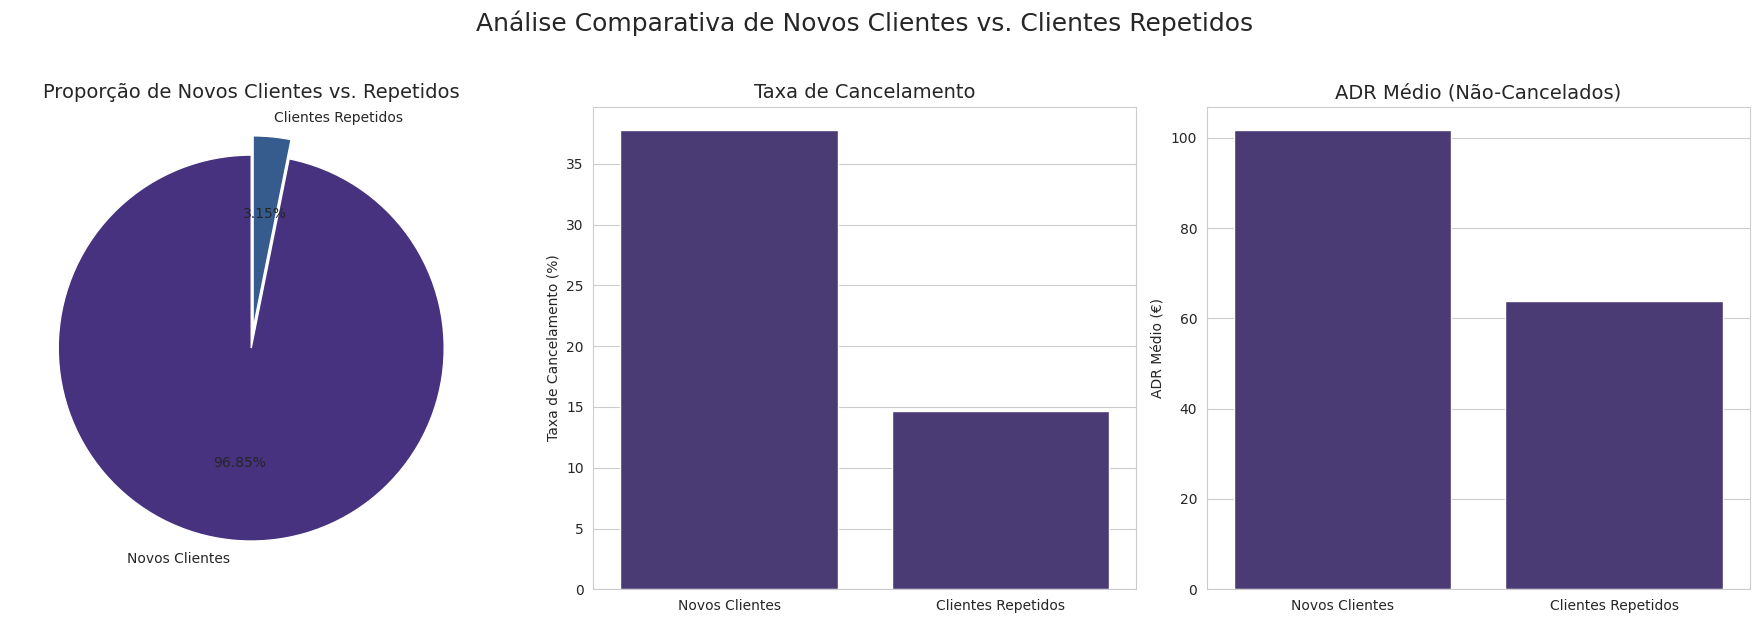

In [ ]:
# --- Início da Fase de Limpeza (Garantindo que df_limpo esteja atualizado) ---
df = pd.read_csv('hotel_booking.csv')
colunas_para_remover = ['name', 'email', 'phone-number', 'credit_card', 'company']
df_limpo = df.drop(columns=colunas_para_remover)
df_limpo['children'].fillna(0, inplace=True)
df_limpo['country'].fillna(df_limpo['country'].mode()[0], inplace=True)
df_limpo['agent'].fillna(0, inplace=True)
df_limpo = df_limpo[~((df_limpo['adults'] == 0) & (df_limpo['children'] == 0) & (df_limpo['babies'] == 0))]
df_limpo = df_limpo[df_limpo['adr'] < 5000]

# --- Início da Análise de Clientes Repetidos ---

# 1. Proporção de Clientes Repetidos vs. Novos
guest_counts = df_limpo['is_repeated_guest'].value_counts()
guest_perc = df_limpo['is_repeated_guest'].value_counts(normalize=True) * 100
print("--- Proporção de Clientes ---")
print(guest_counts)
print(f"\nPercentual de Clientes Repetidos: {guest_perc[1]:.2f}%")

# 2. Taxa de Cancelamento por tipo de cliente
cancellation_by_guest_type = df_limpo.groupby('is_repeated_guest')['is_canceled'].mean().reset_index()
cancellation_by_guest_type['cancellation_rate_%'] = cancellation_by_guest_type['is_canceled'] * 100
print("\n--- Taxa de Cancelamento por Tipo de Cliente ---")
print(cancellation_by_guest_type[['is_repeated_guest', 'cancellation_rate_%']])
# Mapeando 0 e 1 para rótulos mais claros para o gráfico
cancellation_by_guest_type['is_repeated_guest'] = cancellation_by_guest_type['is_repeated_guest'].map({0: 'Novos Clientes', 1: 'Clientes Repetidos'})


# 3. ADR Médio por tipo de cliente (apenas para reservas não canceladas)
adr_by_guest_type = df_limpo[df_limpo['is_canceled'] == 0].groupby('is_repeated_guest')['adr'].mean().reset_index()
print("\n--- ADR Médio por Tipo de Cliente (Reservas Não-Canceladas) ---")
print(adr_by_guest_type)
# Mapeando 0 e 1 para rótulos mais claros para o gráfico
adr_by_guest_type['is_repeated_guest'] = adr_by_guest_type['is_repeated_guest'].map({0: 'Novos Clientes', 1: 'Clientes Repetidos'})


# --- Visualizações ---
plt.figure(figsize=(18, 6))
sns.set_palette('viridis')

# Gráfico 1: Proporção de Clientes
plt.subplot(1, 3, 1)
plt.pie(guest_counts, labels=['Novos Clientes', 'Clientes Repetidos'], autopct='%.2f%%', startangle=90, explode=[0, 0.1])
plt.title('Proporção de Novos Clientes vs. Repetidos', fontsize=14)

# Gráfico 2: Taxa de Cancelamento
plt.subplot(1, 3, 2)
sns.barplot(data=cancellation_by_guest_type, x='is_repeated_guest', y='cancellation_rate_%')
plt.title('Taxa de Cancelamento', fontsize=14)
plt.xlabel('')
plt.ylabel('Taxa de Cancelamento (%)')

# Gráfico 3: ADR Médio
plt.subplot(1, 3, 3)
sns.barplot(data=adr_by_guest_type, x='is_repeated_guest', y='adr')
plt.title('ADR Médio (Não-Cancelados)', fontsize=14)
plt.xlabel('')
plt.ylabel('ADR Médio (€)')

plt.suptitle('Análise Comparativa de Novos Clientes vs. Clientes Repetidos', fontsize=18, y=1.03)
plt.tight_layout()
plt.savefig('analise_clientes_repetidos.png')
plt.show()

# Análise de Perfil de Cliente e Seus Efeitos

**Objetivo:**

O objetivo desta célula é analisar o comportamento de reserva e cancelamento com base em diferentes classificações de clientes: o `customer_type` original do dataset e um novo `guest_profile` criado (Viajante Solo, Casal, Família, Grupo de Adultos).

**Insights Obtidos:**

*   **Distribuição por Tipo de Cliente (`customer_type`):** O tipo "Transient" é o mais comum, seguido por "Transient-Party", "Contract" e "Group".
*   **Taxa de Cancelamento por Tipo de Cliente (`customer_type`):** Clientes "Transient" têm a maior taxa de cancelamento, enquanto clientes "Group" têm a menor. Clientes "Contract" e "Transient-Party" têm taxas intermediárias. Isso sugere que o tipo de cliente tem um impacto significativo na probabilidade de cancelamento.
*   **Distribuição por Perfil de Hóspede (`guest_profile`):** O perfil "Casal" é o mais frequente, seguido por "Viajante Solo", "Família" e "Grupo de Adultos".
*   **ADR Médio por Perfil de Hóspede (`guest_profile`):** O ADR médio para reservas não canceladas é mais alto para "Grupo de Adultos" e "Família", e menor para "Viajante Solo". Isso é intuitivo, pois mais hóspedes geralmente resultam em tarifas mais altas ou quartos maiores.

/tmp/ipython-input-2822449066.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['children'].fillna(0, inplace=True)
/tmp/ipython-input-2822449066.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

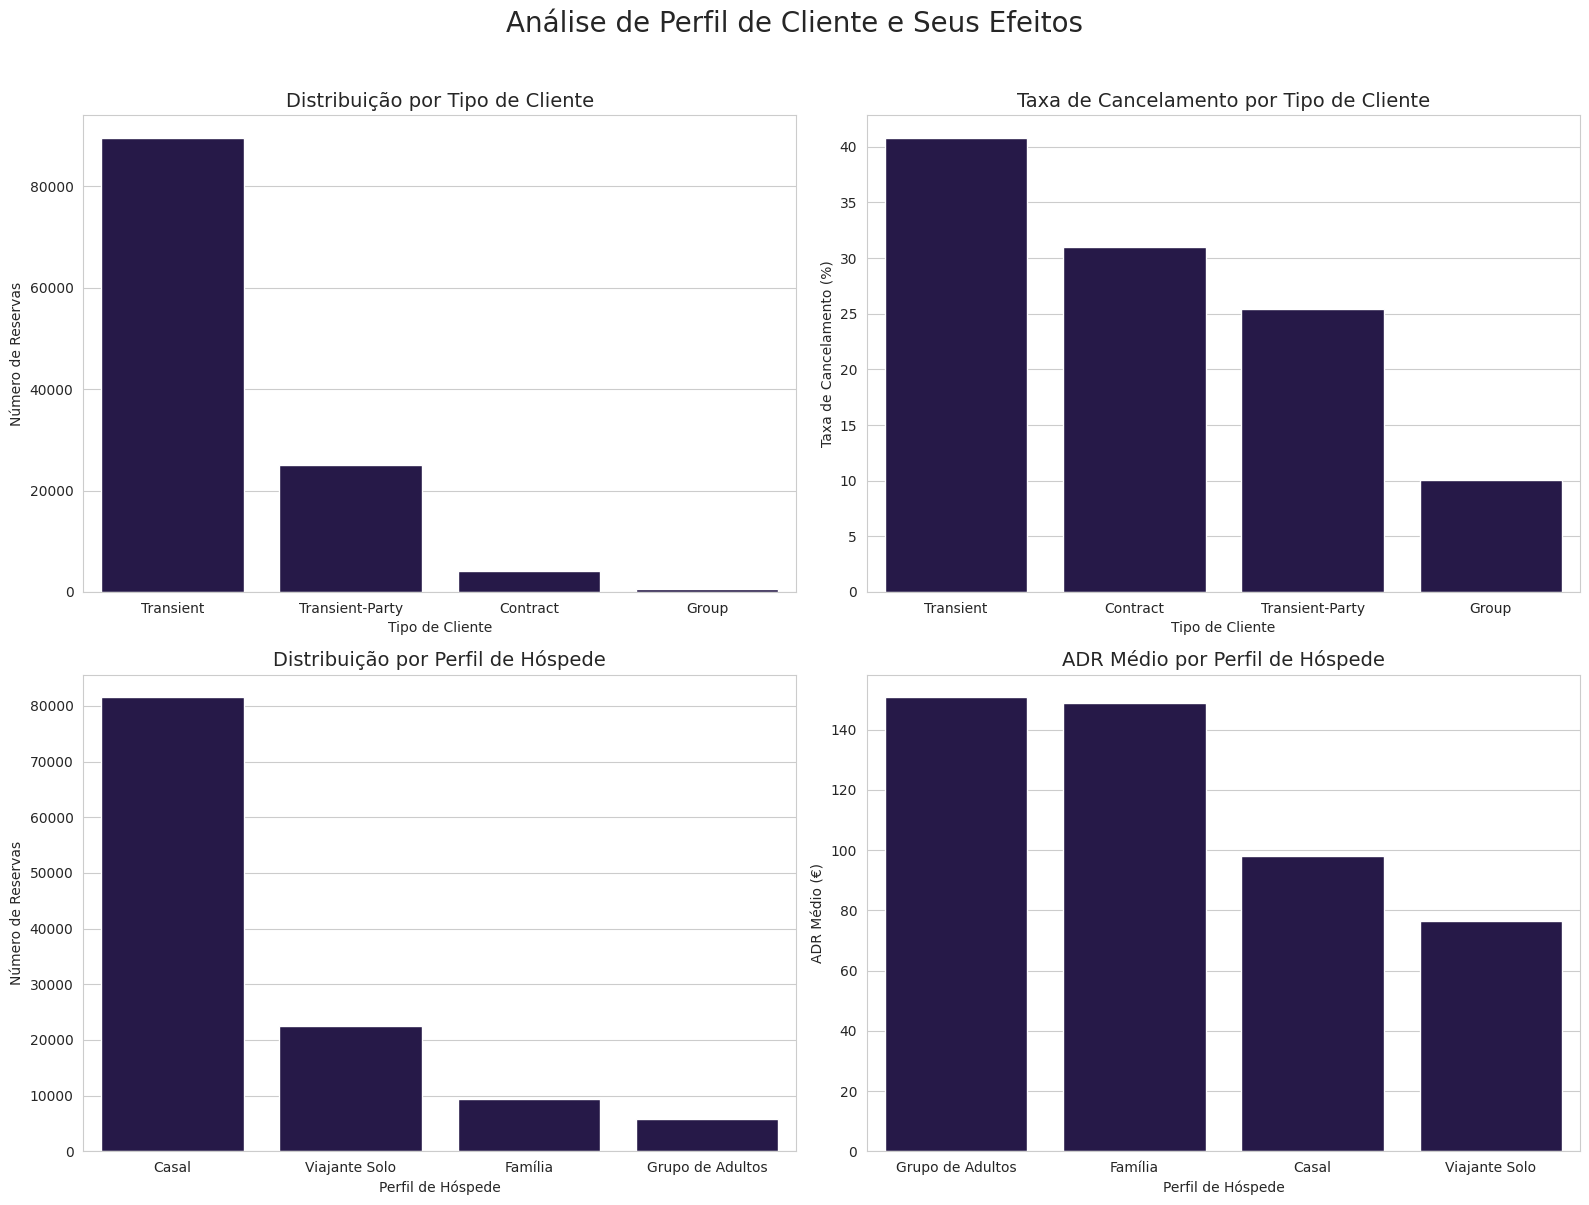

In [ ]:
# --- Início da Fase de Limpeza (Garantindo que df_limpo esteja atualizado) ---
df = pd.read_csv('hotel_booking.csv')
colunas_para_remover = ['name', 'email', 'phone-number', 'credit_card', 'company']
df_limpo = df.drop(columns=colunas_para_remover)
df_limpo['children'].fillna(0, inplace=True)
df_limpo['country'].fillna(df_limpo['country'].mode()[0], inplace=True)
df_limpo['agent'].fillna(0, inplace=True)
df_limpo = df_limpo[~((df_limpo['adults'] == 0) & (df_limpo['children'] == 0) & (df_limpo['babies'] == 0))]
df_limpo = df_limpo[df_limpo['adr'] < 5000]

# --- Início da Análise de Perfil de Cliente ---

# 1. Criando uma feature para perfil de hóspede (Solo, Casal, Família)
def get_guest_profile(row):
    if (row['children'] > 0) or (row['babies'] > 0):
        return 'Família'
    elif row['adults'] == 1:
        return 'Viajante Solo'
    elif row['adults'] == 2:
        return 'Casal'
    else:
        return 'Grupo de Adultos'

df_limpo['guest_profile'] = df_limpo.apply(get_guest_profile, axis=1)

# --- Análises e Visualizações ---
sns.set_palette('magma')
plt.figure(figsize=(16, 12))
plt.suptitle('Análise de Perfil de Cliente e Seus Efeitos', fontsize=20, y=1.0)

# Gráfico 1: Distribuição dos Tipos de Cliente (Customer Type)
plt.subplot(2, 2, 1)
sns.countplot(data=df_limpo, x='customer_type', order=df_limpo['customer_type'].value_counts().index)
plt.title('Distribuição por Tipo de Cliente', fontsize=14)
plt.xlabel('Tipo de Cliente')
plt.ylabel('Número de Reservas')

# Gráfico 2: Taxa de Cancelamento por Tipo de Cliente
plt.subplot(2, 2, 2)
# Agrupando e calculando a taxa
cancellation_by_customer_type = df_limpo.groupby('customer_type')['is_canceled'].mean().reset_index()
cancellation_by_customer_type['cancellation_rate_%'] = cancellation_by_customer_type['is_canceled'] * 100
sns.barplot(data=cancellation_by_customer_type, x='customer_type', y='cancellation_rate_%', order=cancellation_by_customer_type.sort_values('cancellation_rate_%', ascending=False)['customer_type'])
plt.title('Taxa de Cancelamento por Tipo de Cliente', fontsize=14)
plt.xlabel('Tipo de Cliente')
plt.ylabel('Taxa de Cancelamento (%)')

# Gráfico 3: Distribuição dos Perfis de Hóspedes (Solo, Casal, Família)
plt.subplot(2, 2, 3)
sns.countplot(data=df_limpo, x='guest_profile', order=df_limpo['guest_profile'].value_counts().index)
plt.title('Distribuição por Perfil de Hóspede', fontsize=14)
plt.xlabel('Perfil de Hóspede')
plt.ylabel('Número de Reservas')

# Gráfico 4: ADR Médio por Perfil de Hóspede (reservas não canceladas)
plt.subplot(2, 2, 4)
# Filtrando, agrupando e calculando a média
adr_by_profile = df_limpo[df_limpo['is_canceled'] == 0].groupby('guest_profile')['adr'].mean().reset_index()
sns.barplot(data=adr_by_profile, x='guest_profile', y='adr', order=adr_by_profile.sort_values('adr', ascending=False)['guest_profile'])
plt.title('ADR Médio por Perfil de Hóspede', fontsize=14)
plt.xlabel('Perfil de Hóspede')
plt.ylabel('ADR Médio (€)')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('analise_perfil_cliente.png')
plt.show()


# Análise de Desempenho por Canal de Marketing (Market Segment)

**Objetivo:**

O objetivo desta célula é analisar o desempenho das reservas com base no segmento de mercado (`market_segment`). Isso inclui o volume total de reservas, a taxa de cancelamento e o ADR médio para cada segmento.

**Insights Obtidos:**

*   **Volume Total de Reservas:** "Online TA" (Agências de Viagem Online) e "Offline TA/TO" (Agências de Viagem/Operadores Turísticos Offline) são os segmentos com o maior volume de reservas.
*   **Taxa de Cancelamento:** O segmento "Undefined" tem uma taxa de cancelamento de 100% (com um volume muito baixo), seguido por "Groups" com uma taxa alta. Segmentos como "Complementary", "Direct" e "Corporate" têm taxas de cancelamento mais baixas. Isso indica que o canal pelo qual a reserva é feita influencia a probabilidade de cancelamento.
*   **ADR Médio:** "Online TA" e "Direct" tendem a ter um ADR médio mais alto para reservas confirmadas, enquanto "Complementary" e "Corporate" têm ADRs médios mais baixos.

/tmp/ipython-input-20099136.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['children'].fillna(0, inplace=True)
/tmp/ipython-input-20099136.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

--- Análise por Segmento de Mercado ---
  market_segment  total_bookings  cancellation_rate     avg_adr  \
6      Online TA           56408           0.367590  117.318022   
5  Offline TA/TO           24181           0.343286   87.259609   
4         Groups           19791           0.611086   79.559620   
3         Direct           12582           0.153712  115.634595   
2      Corporate            5282           0.187618   69.528332   
1  Complementary             728           0.122253    2.945838   
0       Aviation             235           0.221277  100.994383   
7      Undefined               2           1.000000   15.000000   

   cancellation_rate_%  
6            36.758970  
5            34.328605  
4            61.108585  
3            15.371165  
2            18.761833  
1            12.225275  
0            22.127660  
7           100.000000  


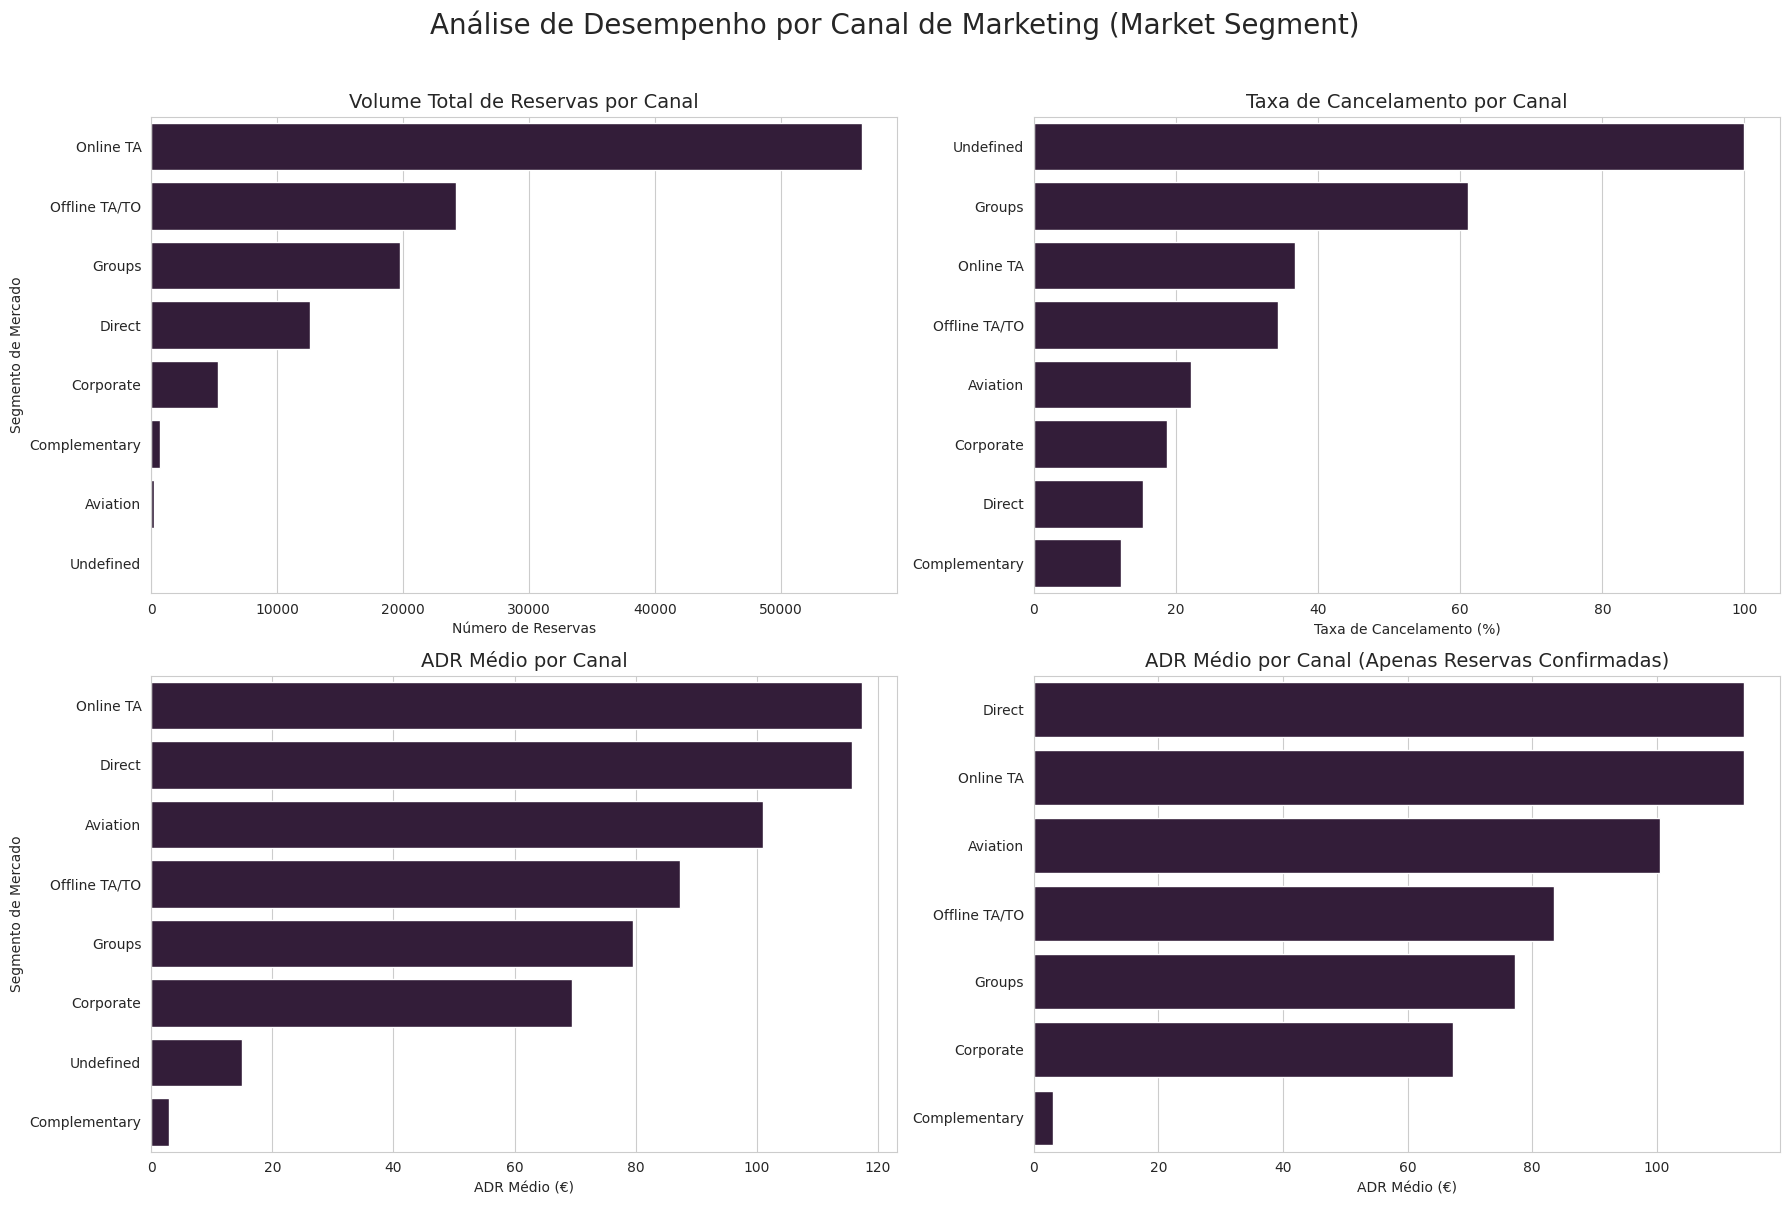

In [ ]:
# --- Início da Fase de Limpeza (Garantindo que df_limpo esteja atualizado) ---
df = pd.read_csv('hotel_booking.csv')
colunas_para_remover = ['name', 'email', 'phone-number', 'credit_card', 'company']
df_limpo = df.drop(columns=colunas_para_remover)
df_limpo['children'].fillna(0, inplace=True)
df_limpo['country'].fillna(df_limpo['country'].mode()[0], inplace=True)
df_limpo['agent'].fillna(0, inplace=True)
df_limpo = df_limpo[~((df_limpo['adults'] == 0) & (df_limpo['children'] == 0) & (df_limpo['babies'] == 0))]
df_limpo = df_limpo[df_limpo['adr'] < 5000]

# --- Início da Análise de Canais de Distribuição ---

# Agrupando por segmento de mercado para análise
segment_analysis = df_limpo.groupby('market_segment').agg(
    total_bookings=('hotel', 'count'),
    cancellation_rate=('is_canceled', 'mean'),
    avg_adr=('adr', 'mean')
).reset_index()

# Convertendo a taxa de cancelamento para porcentagem
segment_analysis['cancellation_rate_%'] = segment_analysis['cancellation_rate'] * 100

print("--- Análise por Segmento de Mercado ---")
print(segment_analysis.sort_values('total_bookings', ascending=False))


# --- Visualizações ---
sns.set_palette('rocket')
plt.figure(figsize=(18, 12))
plt.suptitle('Análise de Desempenho por Canal de Marketing (Market Segment)', fontsize=20, y=1.0)

# Gráfico 1: Volume Total de Reservas por Canal
plt.subplot(2, 2, 1)
sns.barplot(data=segment_analysis.sort_values('total_bookings', ascending=False), x='total_bookings', y='market_segment')
plt.title('Volume Total de Reservas por Canal', fontsize=14)
plt.xlabel('Número de Reservas')
plt.ylabel('Segmento de Mercado')

# Gráfico 2: Taxa de Cancelamento por Canal
plt.subplot(2, 2, 2)
sns.barplot(data=segment_analysis.sort_values('cancellation_rate_%', ascending=False), x='cancellation_rate_%', y='market_segment')
plt.title('Taxa de Cancelamento por Canal', fontsize=14)
plt.xlabel('Taxa de Cancelamento (%)')
plt.ylabel('')

# Gráfico 3: ADR Médio por Canal
plt.subplot(2, 2, 3)
sns.barplot(data=segment_analysis.sort_values('avg_adr', ascending=False), x='avg_adr', y='market_segment')
plt.title('ADR Médio por Canal', fontsize=14)
plt.xlabel('ADR Médio (€)')
plt.ylabel('Segmento de Mercado')

# Gráfico 4: ADR Médio vs. Taxa de Cancelamento (Apenas reservas não canceladas)
plt.subplot(2, 2, 4)
adr_non_canceled = df_limpo[df_limpo['is_canceled'] == 0].groupby('market_segment')['adr'].mean().reset_index()
sns.barplot(data=adr_non_canceled.sort_values('adr', ascending=False), x='adr', y='market_segment')
plt.title('ADR Médio por Canal (Apenas Reservas Confirmadas)', fontsize=14)
plt.xlabel('ADR Médio (€)')
plt.ylabel('')


plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('analise_canais_reserva.png')
plt.show()

# Análise de Pedidos Especiais e Seus Efeitos

**Objetivo:**

O objetivo desta célula é analisar a relação entre o número de pedidos especiais (`total_of_special_requests`) em uma reserva e a taxa de cancelamento e o ADR médio. A hipótese é que reservas com mais pedidos especiais podem ser mais firmes (menos propensas a cancelar) e/ou ter um ADR mais alto.

**Insights Obtidos:**

*   **Distribuição do Número de Pedidos Especiais:** A vasta maioria das reservas não tem pedidos especiais (0), e o número de reservas diminui drasticamente à medida que o número de pedidos especiais aumenta.
*   **Taxa de Cancelamento vs. Pedidos Especiais:** Há uma clara tendência decrescente na taxa de cancelamento à medida que o número de pedidos especiais aumenta. Reservas sem pedidos especiais têm a maior taxa de cancelamento, enquanto reservas com 5 pedidos especiais têm a menor taxa. Isso sugere que clientes que fazem pedidos especiais estão mais comprometidos com a reserva.
*   **ADR Médio vs. Pedidos Especiais:** O ADR médio para reservas não canceladas tende a aumentar com o número de pedidos especiais, embora haja alguma variação nos números mais altos de pedidos. Clientes que solicitam mais parecem estar associados a reservas de maior valor.

/tmp/ipython-input-242488214.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['children'].fillna(0, inplace=True)
/tmp/ipython-input-242488214.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

--- Análise por Número de Pedidos Especiais ---
   total_of_special_requests  total_bookings  cancellation_rate  \
0                          0           70200           0.477678   
1                          1           33183           0.220474   
2                          2           12952           0.221279   
3                          3            2494           0.178428   
4                          4             340           0.105882   
5                          5              40           0.050000   

   cancellation_rate_%  
0            47.767806  
1            22.047434  
2            22.127857  
3            17.842823  
4            10.588235  
5             5.000000  


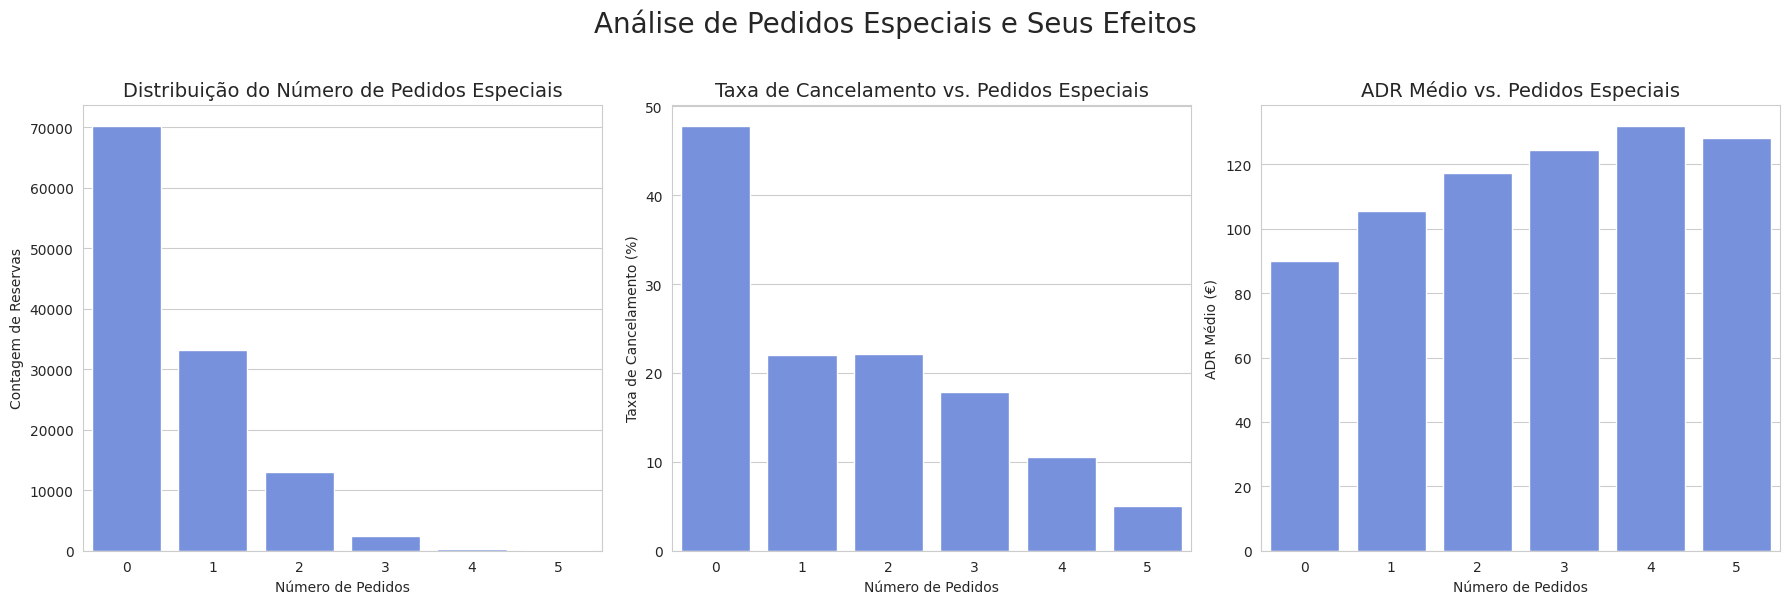

In [ ]:
# --- Início da Fase de Limpeza (Garantindo que df_limpo esteja atualizado) ---
df = pd.read_csv('hotel_booking.csv')
colunas_para_remover = ['name', 'email', 'phone-number', 'credit_card', 'company']
df_limpo = df.drop(columns=colunas_para_remover)
df_limpo['children'].fillna(0, inplace=True)
df_limpo['country'].fillna(df_limpo['country'].mode()[0], inplace=True)
df_limpo['agent'].fillna(0, inplace=True)
df_limpo = df_limpo[~((df_limpo['adults'] == 0) & (df_limpo['children'] == 0) & (df_limpo['babies'] == 0))]
df_limpo = df_limpo[df_limpo['adr'] < 5000]

# --- Início da Análise de Pedidos Especiais ---

# Agrupando por número de pedidos especiais para análise
special_requests_analysis = df_limpo.groupby('total_of_special_requests').agg(
    total_bookings=('hotel', 'count'),
    cancellation_rate=('is_canceled', 'mean'),
).reset_index()

# Convertendo a taxa de cancelamento para porcentagem
special_requests_analysis['cancellation_rate_%'] = special_requests_analysis['cancellation_rate'] * 100

print("--- Análise por Número de Pedidos Especiais ---")
print(special_requests_analysis)

# --- Visualizações ---
sns.set_palette('coolwarm')
plt.figure(figsize=(18, 6))
plt.suptitle('Análise de Pedidos Especiais e Seus Efeitos', fontsize=20, y=1.0)

# Gráfico 1: Distribuição do Número de Pedidos Especiais
plt.subplot(1, 3, 1)
sns.countplot(data=df_limpo, x='total_of_special_requests')
plt.title('Distribuição do Número de Pedidos Especiais', fontsize=14)
plt.xlabel('Número de Pedidos')
plt.ylabel('Contagem de Reservas')

# Gráfico 2: Taxa de Cancelamento vs. Pedidos Especiais
plt.subplot(1, 3, 2)
sns.barplot(data=special_requests_analysis, x='total_of_special_requests', y='cancellation_rate_%')
plt.title('Taxa de Cancelamento vs. Pedidos Especiais', fontsize=14)
plt.xlabel('Número de Pedidos')
plt.ylabel('Taxa de Cancelamento (%)')

# Gráfico 3: ADR Médio vs. Pedidos Especiais (Apenas reservas não canceladas)
plt.subplot(1, 3, 3)
adr_requests = df_limpo[df_limpo['is_canceled'] == 0].groupby('total_of_special_requests')['adr'].mean().reset_index()
sns.barplot(data=adr_requests, x='total_of_special_requests', y='adr')
plt.title('ADR Médio vs. Pedidos Especiais', fontsize=14)
plt.xlabel('Número de Pedidos')
plt.ylabel('ADR Médio (€)')

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('analise_pedidos_especiais.png')
plt.show()

/tmp/ipython-input-3117187204.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['children'].fillna(0, inplace=True)
/tmp/ipython-input-3117187204.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

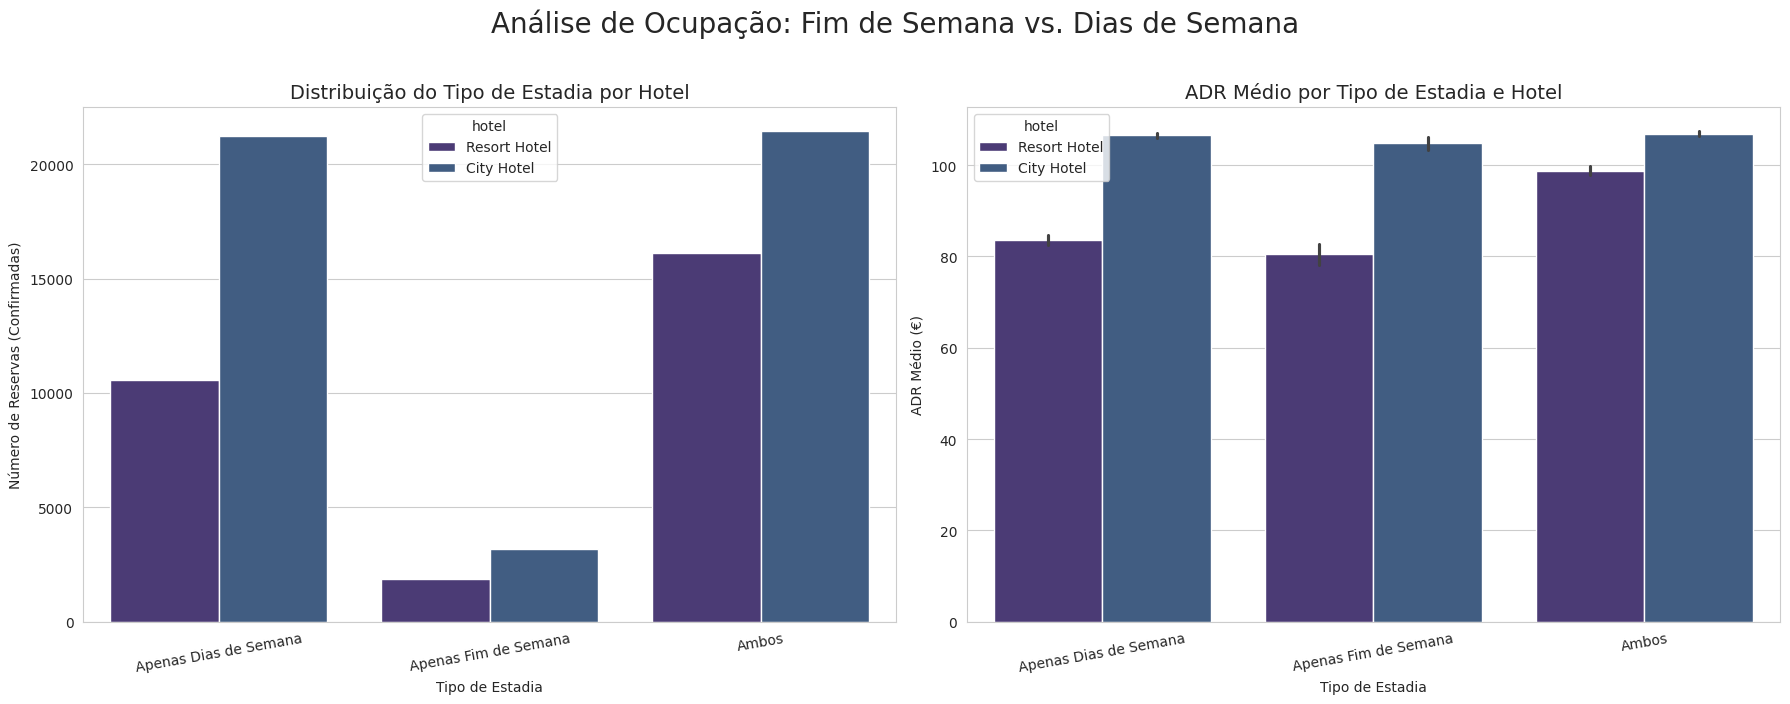


--- Duração Média da Estadia por Tipo e Hotel ---
                                    stays_in_weekend_nights  \
hotel        stay_type                                        
City Hotel   Ambos                                     1.52   
             Apenas Dias de Semana                     0.00   
             Apenas Fim de Semana                      1.33   
Resort Hotel Ambos                                     1.89   
             Apenas Dias de Semana                     0.00   
             Apenas Fim de Semana                      1.21   

                                    stays_in_week_nights  total_avg_nights  
hotel        stay_type                                                      
City Hotel   Ambos                                  2.44              3.96  
             Apenas Dias de Semana                  2.14              2.14  
             Apenas Fim de Semana                   0.00              1.33  
Resort Hotel Ambos                                  4.15   

In [ ]:
# --- Início da Fase de Limpeza (Garantindo que df_limpo esteja atualizado) ---
df = pd.read_csv('hotel_booking.csv')
colunas_para_remover = ['name', 'email', 'phone-number', 'credit_card', 'company']
df_limpo = df.drop(columns=colunas_para_remover)
df_limpo['children'].fillna(0, inplace=True)
df_limpo['country'].fillna(df_limpo['country'].mode()[0], inplace=True)
df_limpo['agent'].fillna(0, inplace=True)
df_limpo = df_limpo[~((df_limpo['adults'] == 0) & (df_limpo['children'] == 0) & (df_limpo['babies'] == 0))]
df_limpo = df_limpo[df_limpo['adr'] < 5000]

# --- Início da Análise de Ocupação ---

# Criando uma feature para o tipo de estadia
def get_stay_type(row):
    is_weekend = row['stays_in_weekend_nights'] > 0
    is_week = row['stays_in_week_nights'] > 0
    if is_weekend and not is_week: return 'Apenas Fim de Semana'
    elif not is_weekend and is_week: return 'Apenas Dias de Semana'
    elif is_weekend and is_week: return 'Ambos'
    else: return 'Day Use / Erro'

# Aplicando a função em reservas não canceladas para focar na ocupação real
df_ocupacao = df_limpo[df_limpo['is_canceled'] == 0].copy()
df_ocupacao['stay_type'] = df_ocupacao.apply(get_stay_type, axis=1)
df_ocupacao = df_ocupacao[df_ocupacao['stay_type'] != 'Day Use / Erro']

# --- Visualizações ---
sns.set_palette('viridis')
plt.figure(figsize=(18, 7))
plt.suptitle('Análise de Ocupação: Fim de Semana vs. Dias de Semana', fontsize=20, y=1.0)

# Gráfico 1: Distribuição do Tipo de Estadia por Hotel
plt.subplot(1, 2, 1)
sns.countplot(data=df_ocupacao, x='stay_type', hue='hotel', order=['Apenas Dias de Semana', 'Apenas Fim de Semana', 'Ambos'])
plt.title('Distribuição do Tipo de Estadia por Hotel', fontsize=14)
plt.xlabel('Tipo de Estadia')
plt.ylabel('Número de Reservas (Confirmadas)')
plt.xticks(rotation=10)

# Gráfico 2: ADR Médio por Tipo de Estadia e Hotel
plt.subplot(1, 2, 2)
sns.barplot(data=df_ocupacao, x='stay_type', y='adr', hue='hotel', order=['Apenas Dias de Semana', 'Apenas Fim de Semana', 'Ambos'])
plt.title('ADR Médio por Tipo de Estadia e Hotel', fontsize=14)
plt.xlabel('Tipo de Estadia')
plt.ylabel('ADR Médio (€)')
plt.xticks(rotation=10)

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig('analise_ocupacao_fds.png')
plt.show()

# Análise da Duração Média da Estadia
avg_nights = df_ocupacao.groupby(['hotel', 'stay_type'])[['stays_in_weekend_nights', 'stays_in_week_nights']].mean().round(2)
avg_nights['total_avg_nights'] = avg_nights['stays_in_weekend_nights'] + avg_nights['stays_in_week_nights']
print("\n--- Duração Média da Estadia por Tipo e Hotel ---")
print(avg_nights)

# Modelo de Previsão de Cancelamento

**Objetivo:**

O objetivo principal desta célula é construir um modelo de classificação (RandomForestClassifier) para prever se uma reserva será cancelada (`is_canceled`). Utilizamos features relevantes do dataset (excluindo aquelas que poderiam "vazar" a informação do cancelamento) e avaliamos o desempenho do modelo.

**Insights Obtidos:**

*   **Divisão Treino/Teste:** O dataset foi dividido em conjuntos de treino e teste (75%/25%) de forma estratificada para garantir que a proporção de cancelamentos seja similar em ambos os conjuntos.
*   **Métricas de Avaliação:**
    *   **Acurácia:** 85.68% - O modelo classifica corretamente a reserva como cancelada ou não em cerca de 85.68% das vezes.
    *   **Precisão (Precision):** 89.39% - Quando o modelo prevê que uma reserva será cancelada, ele está correto em cerca de 89.39% das vezes. (Importante para não classificar erradamente reservas que seriam confirmadas como canceladas).
    *   **Recall (Sensibilidade):** 69.65% - O modelo identifica corretamente cerca de 69.65% de todas as reservas que *realmente* foram canceladas. (Importante para não perder muitos cancelamentos reais).
    *   **F1-Score:** 78.29% - Uma métrica de equilíbrio entre Precision e Recall.
*   **Matriz de Confusão:** A matriz de confusão detalha os resultados:
    *   **Verdadeiros Negativos (Não Cancelou, Previsto Não Cancelou):** 17840 - O modelo previu corretamente que essas reservas não seriam canceladas.
    *   **Falsos Positivos (Não Cancelou, Previsto Cancelou):** 913 - O modelo previu que essas reservas seriam canceladas, mas elas não foram.
    *   **Falsos Negativos (Cancelou, Previsto Não Cancelou):** 3354 - O modelo previu que essas reservas não seriam canceladas, mas elas foram.
    *   **Verdadeiros Positivos (Cancelou, Previsto Cancelou):** 7696 - O modelo previu corretamente que essas reservas seriam canceladas.

/tmp/ipython-input-280878814.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['children'].fillna(0, inplace=True)
/tmp/ipython-input-280878814.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

Tamanho do conjunto de treino: 89406 amostras
Tamanho do conjunto de teste: 29803 amostras

--- Treinando Modelo RandomForestClassifier ---

--- Métricas de Avaliação do Modelo de Cancelamento ---
Acurácia: 85.68%
Precisão (Precision): 89.39%
Recall (Sensibilidade): 69.65%
F1-Score: 78.29%


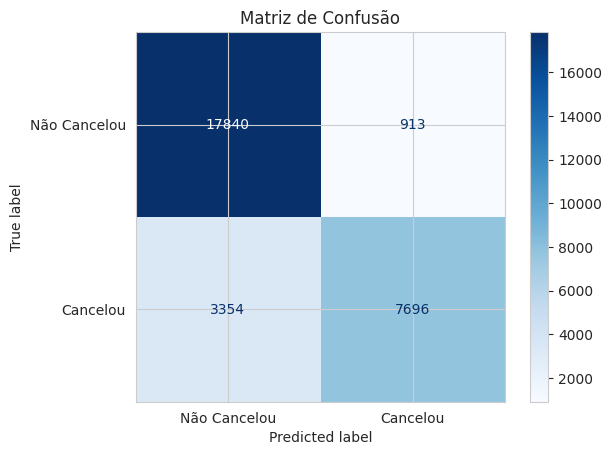

In [ ]:
# --- Início da Fase de Limpeza (Garantindo que df_limpo esteja atualizado) ---
df = pd.read_csv('hotel_booking.csv')
colunas_para_remover = ['name', 'email', 'phone-number', 'credit_card', 'company']
df_limpo = df.drop(columns=colunas_para_remover)
df_limpo['children'].fillna(0, inplace=True)
df_limpo['country'].fillna(df_limpo['country'].mode()[0], inplace=True)
df_limpo['agent'].fillna(0, inplace=True)
df_limpo = df_limpo[~((df_limpo['adults'] == 0) & (df_limpo['children'] == 0) & (df_limpo['babies'] == 0))]
df_limpo = df_limpo[df_limpo['adr'] < 5000]

# --- Início do Modelo de Previsão de Cancelamento ---

# 1. Seleção de Features e Target
# Excluindo colunas que "vazam" a resposta (data leakage)
features_to_drop = ['is_canceled', 'reservation_status', 'reservation_status_date', 'assigned_room_type']
X = df_limpo.drop(columns=features_to_drop)
y = df_limpo['is_canceled']

# 2. Pré-processamento (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# 3. Divisão em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

# 4. Treinamento do Modelo
print("\n--- Treinando Modelo RandomForestClassifier ---")
rfc = RandomForestClassifier(n_estimators=150, max_depth=20, random_state=42, n_jobs=-1, min_samples_leaf=5)
rfc.fit(X_train, y_train)

# 5. Avaliação do Modelo
y_pred = rfc.predict(X_test)
y_pred_proba = rfc.predict_proba(X_test)[:, 1] # Probabilidade de ser '1' (Cancelado)

# Métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Métricas de Avaliação do Modelo de Cancelamento ---")
print(f"Acurácia: {accuracy:.2%}")
print(f"Precisão (Precision): {precision:.2%}")
print(f"Recall (Sensibilidade): {recall:.2%}")
print(f"F1-Score: {f1:.2%}")

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Cancelou', 'Cancelou'])
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão')
plt.savefig('matriz_confusao_cancelamento.png')
plt.show()

# Modelo para Prever Tipo de Quarto Reservado

**Objetivo:**

O objetivo desta célula é construir um modelo de classificação (RandomForestClassifier) para prever o tipo de quarto reservado (`reserved_room_type`) para reservas *não canceladas*. Simplificamos os tipos de quarto para os 4 mais frequentes e uma categoria "Other".

**Insights Obtidos:**

*   **Divisão Treino/Teste:** O dataset foi dividido em conjuntos de treino e teste (75%/25%) de forma estratificada para garantir que a proporção de cada tipo de quarto seja similar em ambos os conjuntos.
*   **Métricas de Avaliação:**
    *   **Acurácia Geral:** 74.40% - O modelo prevê corretamente o tipo de quarto em cerca de 74.40% das vezes.
    *   **Relatório de Classificação:** Fornece métricas (Precision, Recall, F1-Score, Support) para cada tipo de quarto:
        *   O modelo tem um desempenho muito bom na previsão do tipo 'A' (alta precisão e recall), que é o tipo mais comum (alto support).
        *   O desempenho é razoável para os tipos 'D' e 'Other'.
        *   O desempenho é mais fraco para os tipos 'E' e 'F', que têm menos suporte (menos exemplos no dataset), resultando em menor precisão e/ou recall.
*   **Matriz de Confusão:** A matriz de confusão visualiza as previsões versus os tipos de quarto reais. Ela confirma que o modelo acerta a maioria das previsões para o tipo 'A' (diagonal principal), mas tem mais dificuldade em distinguir entre os tipos menos frequentes, levando a erros de classificação entre eles.


/tmp/ipython-input-690497366.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['children'].fillna(0, inplace=True)
/tmp/ipython-input-690497366.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd


--- Treinando Modelo RandomForestClassifier para prever Tipo de Quarto ---

--- Métricas de Avaliação do Modelo de Tipo de Quarto ---
Acurácia Geral: 74.40%

--- Relatório de Classificação Detalhado ---

              precision    recall  f1-score   support

           A       0.90      0.81      0.85     13062
           D       0.53      0.59      0.56      3270
           E       0.33      0.56      0.41      1153
           F       0.45      0.64      0.53       503
       Other       0.68      0.61      0.64       765

    accuracy                           0.74     18753
   macro avg       0.58      0.64      0.60     18753
weighted avg       0.78      0.74      0.76     18753



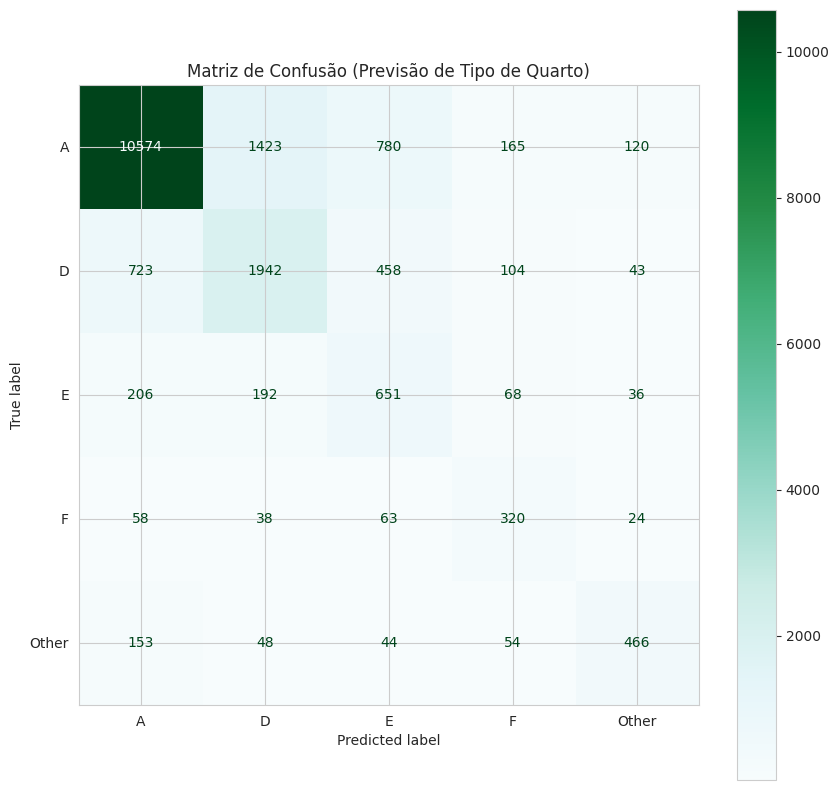

In [ ]:
# --- 1. PREPARAÇÃO E LIMPEZA DOS DADOS ---
df = pd.read_csv('hotel_booking.csv')
colunas_para_remover = ['name', 'email', 'phone-number', 'credit_card', 'company']
df_limpo = df.drop(columns=colunas_para_remover)
df_limpo['children'].fillna(0, inplace=True)
df_limpo['country'].fillna(df_limpo['country'].mode()[0], inplace=True)
df_limpo['agent'].fillna(0, inplace=True)
df_limpo = df_limpo[~((df_limpo['adults'] == 0) & (df_limpo['children'] == 0) & (df_limpo['babies'] == 0))]
df_limpo = df_limpo[df_limpo['adr'] < 5000]

# --- 2. PREPARAÇÃO ESPECÍFICA PARA O MODELO DE TIPO DE QUARTO ---
df_room = df_limpo[df_limpo['is_canceled'] == 0].copy()
top_types = df_room['reserved_room_type'].value_counts().nlargest(4).index
df_room['room_type_simplified'] = df_room['reserved_room_type'].apply(lambda x: x if x in top_types else 'Other')

# --- 3. SELEÇÃO DE FEATURES E PRÉ-PROCESSAMENTO ---
features_to_drop = [
    'is_canceled', 'reservation_status', 'reservation_status_date',
    'assigned_room_type', 'reserved_room_type', 'room_type_simplified'
]
X = df_room.drop(columns=features_to_drop)
y = df_room['room_type_simplified']
X_processed = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.25, random_state=42, stratify=y)

# --- 4. TREINAMENTO DO MODELO ---
print("\n--- Treinando Modelo RandomForestClassifier para prever Tipo de Quarto ---")
rfc_room = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42, n_jobs=-1, class_weight='balanced')
rfc_room.fit(X_train, y_train)

# --- 5. AVALIAÇÃO DO MODELO (CORRIGIDO) ---
# A linha abaixo foi corrigida para usar apenas X_test
y_pred = rfc_room.predict(X_test)

print("\n--- Métricas de Avaliação do Modelo de Tipo de Quarto ---")
print(f"Acurácia Geral: {accuracy_score(y_test, y_pred):.2%}\n")
print("--- Relatório de Classificação Detalhado ---\n")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred, labels=rfc_room.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_room.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='BuGn')
plt.title('Matriz de Confusão (Previsão de Tipo de Quarto)')
plt.savefig('matriz_confusao_tipo_quarto.png')
plt.show()

# Modelo para Prever Lead Time

**Objetivo:**

O objetivo desta célula é construir um modelo de regressão (RandomForestRegressor) para prever o `lead_time` (antecedência da reserva em dias). Isso pode ser útil para entender quais fatores influenciam a antecedência com que os clientes reservam.

**Insights Obtidos:**

*   **Divisão Treino/Teste:** O dataset foi dividido em conjuntos de treino e teste (75%/25%).
*   **Métricas de Avaliação:**
    *   **Erro Médio Absoluto (MAE):** 40.03 dias - Em média, a previsão do modelo para o `lead_time` se desvia em cerca de 40.03 dias do valor real.
    *   **R-squared (R²):** 70.02% - O modelo explica aproximadamente 70.02% da variabilidade no `lead_time`. Isso indica que o modelo tem um poder preditivo razoável para esta variável.
*   **Importância das Features:** A análise de importância das features revela os principais fatores que influenciam o `lead_time`:
    *   **deposit_type_Non Refund:** É a feature mais importante. Reservas não reembolsáveis estão fortemente associadas a um maior ou menor `lead_time` (dependendo da correlação, que não é explicitada apenas pela importância).
    *   **arrival\_date\_week\_number** e **arrival\_date\_year:** A época do ano e o ano de chegada são importantes, sugerindo sazonalidade e tendências anuais na antecedência das reservas.
    *   **agent:** O agente de reserva também é um fator importante.
    *   **stays\_in\_week\_nights**, **customer\_type\_Transient**, **previous\_cancellations**, **stays\_in\_weekend\_nights**, **arrival\_date\_day\_of\_month**, **meal\_HB** também contribuem para a previsão do `lead_time`.
*   O modelo de regressão para prever o `lead_time` apresenta um desempenho aceitável (R² de 70%).

/tmp/ipython-input-2472108911.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['children'].fillna(0, inplace=True)
/tmp/ipython-input-2472108911.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

Tamanho do conjunto de treino: 89406 amostras
Tamanho do conjunto de teste: 29803 amostras

--- Treinando Modelo RandomForestRegressor para prever Lead Time ---

--- Métricas de Avaliação do Modelo de Lead Time ---
Erro Médio Absoluto (MAE): 40.03 dias
R-squared (R²): 70.02%

--- Top 10 Features Mais Importantes para Prever Lead Time ---
                           importance
deposit_type_Non Refund      0.211593
arrival_date_week_number     0.178053
agent                        0.136631
stays_in_week_nights         0.089943
arrival_date_year            0.086301
customer_type_Transient      0.062239
previous_cancellations       0.046551
stays_in_weekend_nights      0.024658
arrival_date_day_of_month    0.023789
meal_HB                      0.020508


/tmp/ipython-input-2472108911.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.importance, y=top_10_features.index, palette='plasma')


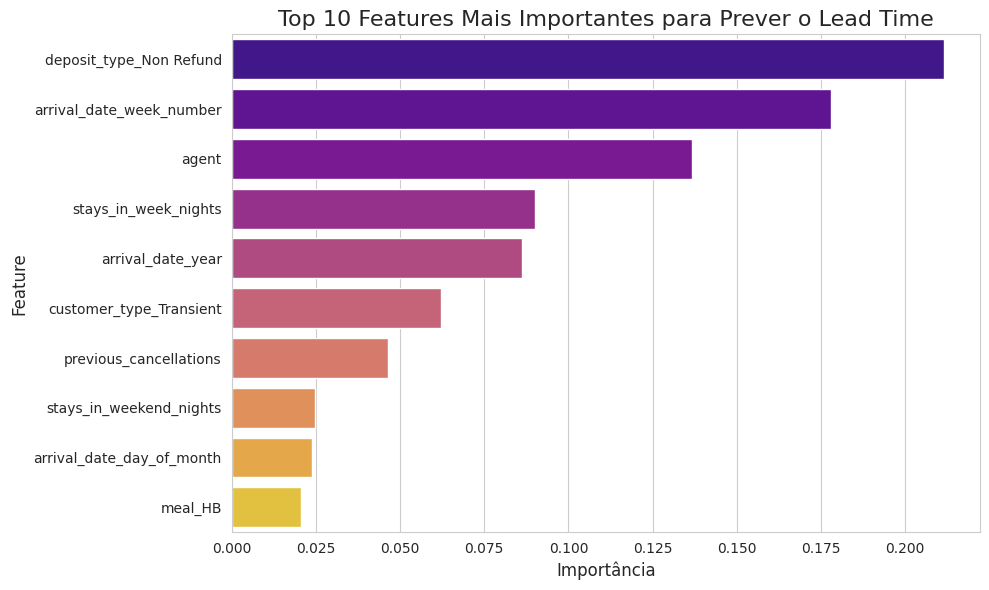

In [ ]:
# --- 1. PREPARAÇÃO E LIMPEZA DOS DADOS ---
df = pd.read_csv('hotel_booking.csv')
colunas_para_remover = ['name', 'email', 'phone-number', 'credit_card', 'company']
df_limpo = df.drop(columns=colunas_para_remover)
df_limpo['children'].fillna(0, inplace=True)
df_limpo['country'].fillna(df_limpo['country'].mode()[0], inplace=True)
df_limpo['agent'].fillna(0, inplace=True)
df_limpo = df_limpo[~((df_limpo['adults'] == 0) & (df_limpo['children'] == 0) & (df_limpo['babies'] == 0))]
df_limpo = df_limpo[df_limpo['adr'] < 5000]

# --- 2. PREPARAÇÃO ESPECÍFICA PARA O MODELO DE LEAD TIME ---
df_leadtime = df_limpo.copy()
df_leadtime['total_guests'] = df_leadtime['adults'] + df_leadtime['children'] + df_leadtime['babies']

# --- 3. SELEÇÃO DE FEATURES E PRÉ-PROCESSAMENTO ---
features_to_drop = [
    'lead_time', 'reservation_status', 'reservation_status_date',
    'assigned_room_type', 'adr', 'days_in_waiting_list', 'is_canceled'
]
X = df_leadtime.drop(columns=features_to_drop)
y = df_leadtime['lead_time']
X_processed = pd.get_dummies(X, drop_first=True)

# Divisão em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.25, random_state=42)
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

# --- 4. TREINAMENTO DO MODELO ---
print("\n--- Treinando Modelo RandomForestRegressor para prever Lead Time ---")
rfr_lead = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42, n_jobs=-1, min_samples_leaf=15)
rfr_lead.fit(X_train, y_train)

# --- 5. AVALIAÇÃO DO MODELO ---
y_pred = rfr_lead.predict(X_test)
print("\n--- Métricas de Avaliação do Modelo de Lead Time ---")
print(f"Erro Médio Absoluto (MAE): {mean_absolute_error(y_test, y_pred):.2f} dias")
print(f"R-squared (R²): {r2_score(y_test, y_pred):.2%}")

# --- 6. ANÁLISE DOS RESULTADOS E VISUALIZAÇÃO ---
feature_importances = pd.DataFrame(rfr_lead.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
top_10_features = feature_importances.head(10)

print("\n--- Top 10 Features Mais Importantes para Prever Lead Time ---")
print(top_10_features)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.importance, y=top_10_features.index, palette='plasma')
plt.title('Top 10 Features Mais Importantes para Prever o Lead Time', fontsize=16)
plt.xlabel('Importância', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig('feature_importance_leadtime.png')
plt.show()

/tmp/ipython-input-95212459.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpo['children'].fillna(0, inplace=True)
/tmp/ipython-input-95212459.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

--- Amostra da Série Temporal de Demanda Semanal (Quarto 'A') ---
  arrival_date  bookings_count
0   2015-07-05             171
1   2015-07-12             165
2   2015-07-19             274
3   2015-07-26             247
4   2015-08-02             201

--- Treinando Modelo RandomForestRegressor para prever Demanda Semanal ---

--- Métricas de Avaliação do Modelo de Demanda ---
Erro Médio Absoluto (MAE): 50.52 reservas/semana
R-squared (R²): 11.37%


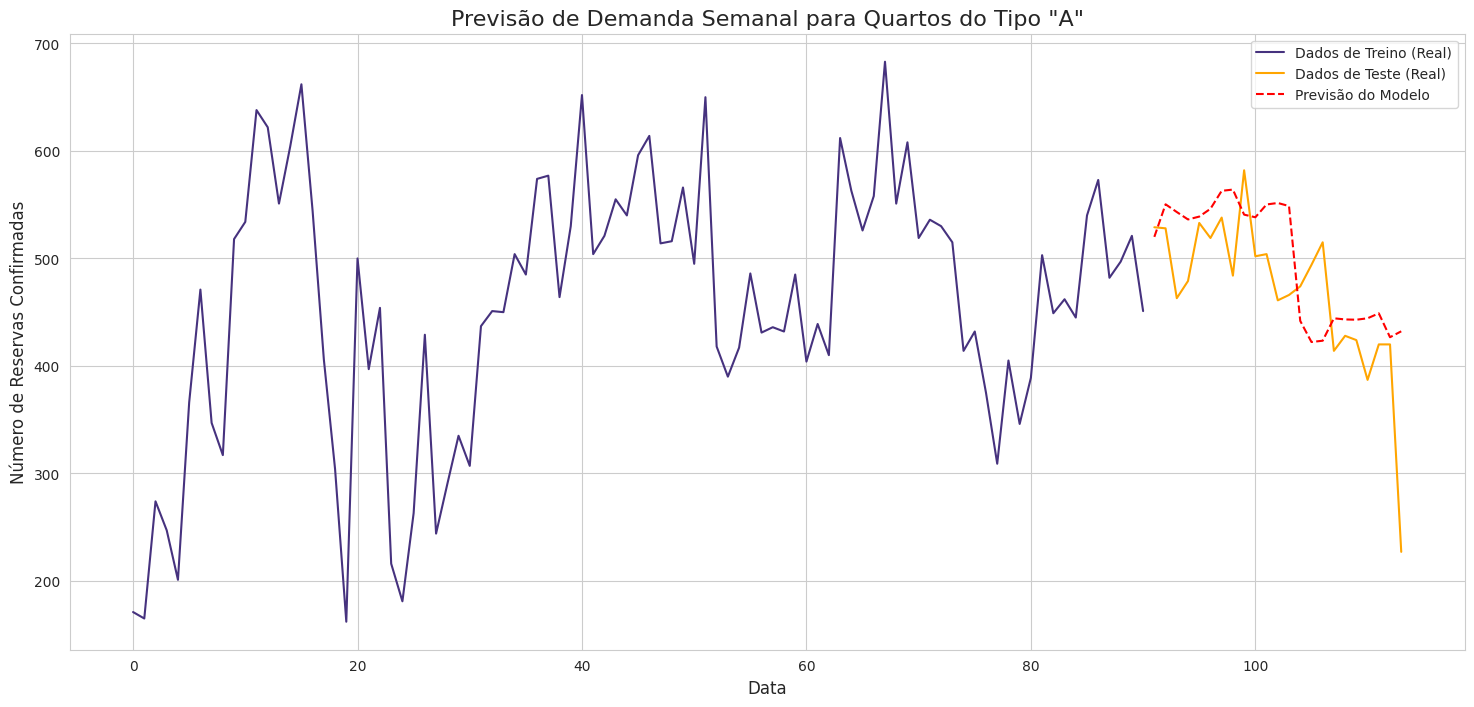

In [ ]:
# --- 1. PREPARAÇÃO E LIMPEZA DOS DADOS ---
df = pd.read_csv('hotel_booking.csv')
colunas_para_remover = ['name', 'email', 'phone-number', 'credit_card', 'company']
df_limpo = df.drop(columns=colunas_para_remover)
df_limpo['children'].fillna(0, inplace=True)
df_limpo['country'].fillna(df_limpo['country'].mode()[0], inplace=True)
df_limpo['agent'].fillna(0, inplace=True)
df_limpo = df_limpo[~((df_limpo['adults'] == 0) & (df_limpo['children'] == 0) & (df_limpo['babies'] == 0))]
df_limpo = df_limpo[df_limpo['adr'] < 5000]

# --- 2. PREPARAÇÃO ESPECÍFICA PARA O MODELO DE DEMANDA ---

# Focamos em reservas confirmadas do tipo de quarto 'A'
df_demand = df_limpo[(df_limpo['is_canceled'] == 0) & (df_limpo['reserved_room_type'] == 'A')].copy()

# Criando uma coluna de data completa
df_demand['arrival_date'] = pd.to_datetime(
    df_demand['arrival_date_year'].astype(str) + '-' +
    df_demand['arrival_date_month'].apply(lambda x: pd.to_datetime(x, format='%B').month).astype(str) + '-' +
    df_demand['arrival_date_day_of_month'].astype(str)
)

# Agregando a demanda por semana
demand_weekly = df_demand.set_index('arrival_date').resample('W').size().reset_index(name='bookings_count')

print("--- Amostra da Série Temporal de Demanda Semanal (Quarto 'A') ---")
print(demand_weekly.head())


# --- 3. ENGENHARIA DE FEATURES E PRÉ-PROCESSAMENTO ---
demand_weekly['week_of_year'] = demand_weekly['arrival_date'].dt.isocalendar().week
demand_weekly['month'] = demand_weekly['arrival_date'].dt.month
demand_weekly['year'] = demand_weekly['arrival_date'].dt.year

X = demand_weekly[['week_of_year', 'month', 'year']]
y = demand_weekly['bookings_count']

# Não vamos embaralhar os dados (shuffle=False) para manter a ordem temporal na divisão
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)


# --- 4. TREINAMENTO DO MODELO ---
print("\n--- Treinando Modelo RandomForestRegressor para prever Demanda Semanal ---")
rfr_demand = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1, min_samples_leaf=2)
rfr_demand.fit(X_train, y_train)


# --- 5. AVALIAÇÃO DO MODELO ---
y_pred = rfr_demand.predict(X_test)
print("\n--- Métricas de Avaliação do Modelo de Demanda ---")
print(f"Erro Médio Absoluto (MAE): {mean_absolute_error(y_test, y_pred):.2f} reservas/semana")
print(f"R-squared (R²): {r2_score(y_test, y_pred):.2%}")


# --- 6. ANÁLISE DOS RESULTADOS E VISUALIZAÇÃO ---
results_df = pd.DataFrame({'Real': y_test, 'Previsto': y_pred}, index=y_test.index)

plt.figure(figsize=(18, 8))
plt.plot(y_train.index, y_train, label='Dados de Treino (Real)')
plt.plot(results_df.index, results_df['Real'], label='Dados de Teste (Real)', color='orange')
plt.plot(results_df.index, results_df['Previsto'], label='Previsão do Modelo', color='red', linestyle='--')

plt.title('Previsão de Demanda Semanal para Quartos do Tipo "A"', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Número de Reservas Confirmadas', fontsize=12)
plt.legend()
plt.grid(True)
plt.savefig('previsao_demanda_quarto_A.png')
plt.show()